# **Speech Processing Lab 10**

Rishabh Tripathi (180030036)

## **AIM**
1. Develop a method for the estimation of pitch by the autocorrelation of speech signal.
2. Develop a cepstrum pitch estimation method.
3. Develop a simple inverse filtering technique(SIFT) pitch estimation method.
Comparison of all these three methods.


In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 10

/content/drive/MyDrive/Speech Processing Lab/Lab 10


## **Theory**

There are a large set of methods that have been developed in the speech processing area for the estimation of pitch. Among them the three mostly used methods include, autocorrelation of speech, cepstrum pitch determination and single inverse filtering technique (SIFT) pitch estimation.

### **Autocorrelation Method**
The autocorrelation function of a periodic (voiced) speech signal will give peaks at every time interval of the pitch period of the glottal vibrations. We can pick these peaks and use the corresponding delay value to get the pitch period and pitch frequency of the sound.

### **Cepstrum Method**
When we use a cepstrum which is high time liftered, we have only the excitation information retained in the signal. The vocal tract information is filtered out. So, we can estimate the pitch frequency from this high time liftered cepstrum by just looking at the significant peak and using the corresponging quefrency value.

### **LP Residual Method**
The LP residual contains just the excitation information as it is the error signal which increases when there are pulses in the voice signal. So we can take the autocorrelation of this LP residual and pick the first significant peak to get the pitch period and pitch frequency of the voice signal.

## **Problem A**
Pitch estimation by autocorrelation method:
1. Divide the given speech signal into 30-40ms blocks of speech frames. Find and plot the auto-correlation sequence of a voiced frame and an unvoiced frame. 
2. Estimate the pitch frequency using this computed auto-correlation for the above  voiced frame and an unvoiced frame. You may set a threshold for a significant peak, and assign zero to pitch frequency if there is no significant peak.


In [ ]:
# Function to plot the waveform
def wave_plot(sound, time, sound_name):
    plt.figure(figsize=(15,5))
    plt.plot(time, sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
def autocorr(sound, plot=0, sound_name=""):
    len = sound.shape[0]
    shift = np.arange(0, len, 1)
    autocorr = np.zeros((shift.shape[0],))

    for curr_shift in shift:
        autocorr[curr_shift] = np.dot(sound[0:len-curr_shift].T,sound[curr_shift:])

    if plot:
        plt.figure(figsize=(15,5))
        plt.plot(shift, autocorr)
        plt.title("Autocorrelation of sound "+ "/" + sound_name + "/")
        plt.xlabel('Shift')
        plt.ylabel('Autocorrelation')
        plt.show()

    else:
        return autocorr

In [132]:
def pitch_autocorr(sound_acf, fs):

    pitch_estimate = 0
    period_delay = 0.00001
    h_threshold = 0.3 * sound_acf[0]

    sound_acf_peaks = signal.find_peaks(sound_acf, height = h_threshold, prominence=1)

    if (len(sound_acf_peaks[0]) > 0):
        period_delay = sound_acf_peaks[0][0] / fs

    if ((period_delay*fs) > (fs/1000)):
        pitch_estimate = 1 / period_delay

    return pitch_estimate

In [ ]:
# Loading the audio file
audio, fs = librosa.load("speech_signal.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

In [ ]:
# Centre time stamp of the voiced sound /ee/ and /ss/ is obtained using WaveSurfer
# /ee/ sound => 0.48 s
# /ss/ sound => 0.97 s

frame_size = 0.040
ee = audio[int((0.48-(frame_size/2))*fs):int((0.48+(frame_size/2))*fs)]
t_ee = np.arange(0, ee.shape[0]/fs, 1/fs)
ss = audio[int((0.97-(frame_size/2))*fs):int((0.97+(frame_size/2))*fs)]
t_ss = np.arange(0, ss.shape[0]/fs, 1/fs)

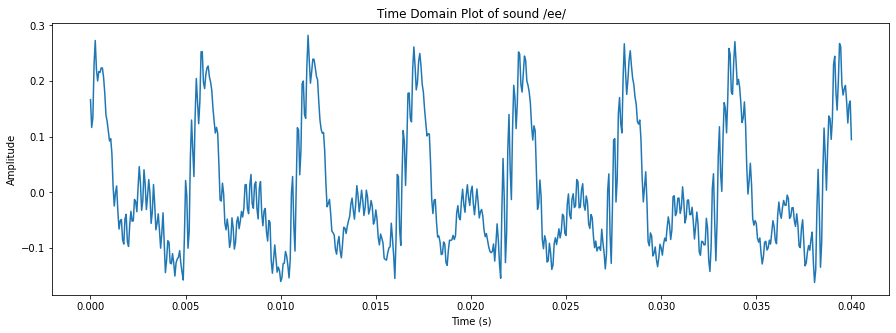

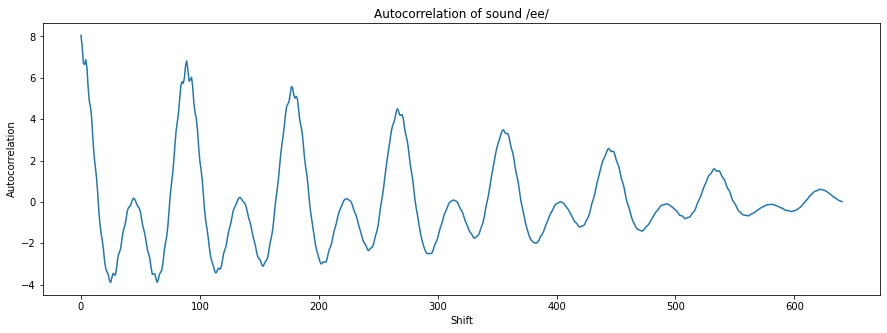

In [50]:
wave_plot(ee, t_ee, "ee")
autocorr(ee, plot=1, sound_name="ee")

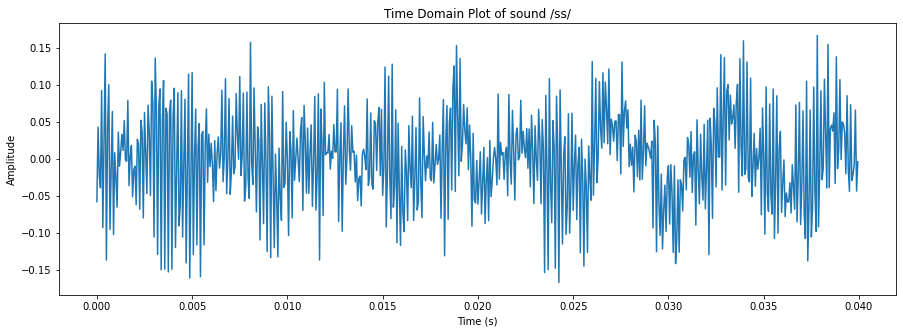

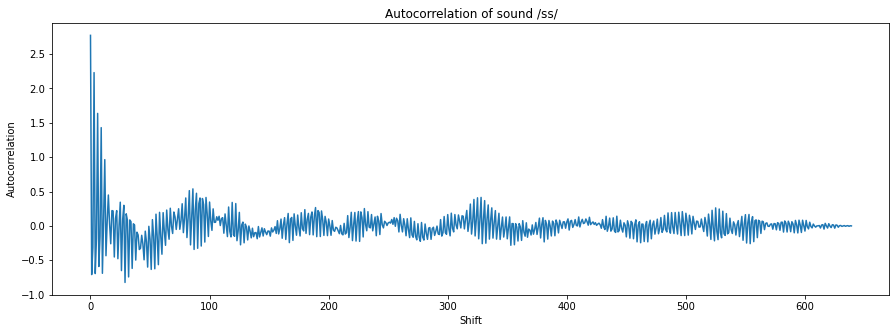

In [51]:
wave_plot(ss, t_ss, "ss")
autocorr(ss, plot=1, sound_name="ss")

In [ ]:
ee_acf = autocorr(ee, plot=0, sound_name="ee")
ss_acf = autocorr(ss, plot=0, sound_name="ss")

ee_pitch = pitch_autocorr(ee_acf, fs)
ss_pitch = pitch_autocorr(ss_acf, fs)

print("Pitch Frequency of the voiced sound /ee/:", ee_pitch, "Hz")
print("Pitch Frequency of the unvoiced sound /ss/:", ss_pitch, "Hz")

Pitch Frequency of the voiced sound /ee/: 179.77528089887642 Hz
Pitch Frequency of the unvoiced sound /ss/: 0 Hz


## **Problem B**
Cepstrum based pitch estimation:
1. Divide the speech into  short segments of 15-20ms frame size. Compute the cepstrum of the speech segment in the quefrency domain for each of these frames  and plot for one voiced frame.
2. Estimate the pitch period by the high time liftering of the cepstrum of the voiced speech. 
3. Estimate the pitch period by the high time liftering of the cepstrum of the unvoiced speech.


In [72]:
# Function to plot or return magnitude spectrum 
def plot_spectrum(sound, sound_name, type='lin'):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    if type == 'log':
        plt.figure(figsize=(15,5))
        plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
        plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
        plt.yscale('log')
        plt.xlim((0, 8000))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

    if type == 'lin':
        plt.figure(figsize=(15,5))
        plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
        plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
        plt.xlim((0, 8000))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

    if type == 'none':
        return f_array[0:total_len//2], 2*audio_fft[0:total_len//2]

In [52]:
# Function to get the cepstrum 
def plot_cepstrum(sound, sound_name, plot= True):

    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    # Getting the log magnitude spectrum
    audio_fft_log = np.log10(np.abs(audio_fft))

    audio_cepstrum = ifft(audio_fft_log)
    real_ceps = audio_cepstrum.real

    if plot:
        plt.figure(figsize=(15,5))
        plt.plot(real_ceps[0:total_len//2])
        plt.ylim((-0.5, 0.5))
        plt.title("Cepstrum of "+ "/" + sound_name + "/")
        plt.xlabel('Quefrency')
        plt.ylabel('Amplitude')
        plt.show()

    else:
        return real_ceps

In [67]:
def compute_cepstrum(sound, frame_size):

    number = int(np.floor(sound.shape[0]/(frame_size*fs)))
    full_cepstrum = np.zeros((1, int(frame_size*fs)))

    for i in range(number):
        frame = sound[int(i*frame_size*fs) : int((i+1)*frame_size*fs)]
        frame_cepstrum = np.expand_dims(plot_cepstrum(frame, "", plot= False), 0)
        full_cepstrum = np.concatenate((full_cepstrum, frame_cepstrum), 0)

    full_cepstrum = full_cepstrum[1:]

    return full_cepstrum

In [68]:
# Centre time stamp of the voiced sound /ee/ and /ss/ is obtained using WaveSurfer
# /ee/ sound => 0.48 s
# /ss/ sound => 0.97 s

frame_size = 0.020
ee = audio[int((0.48-(frame_size/2))*fs):int((0.48+(frame_size/2))*fs)]
t_ee = np.arange(0, ee.shape[0]/fs, 1/fs)
ss = audio[int((0.97-(frame_size/2))*fs):int((0.97+(frame_size/2))*fs)]
t_ss = np.arange(0, ss.shape[0]/fs, 1/fs)

In [69]:
# Computing the cepstrum for each of the frame in the audio
full_cepstrum = compute_cepstrum(audio, frame_size)

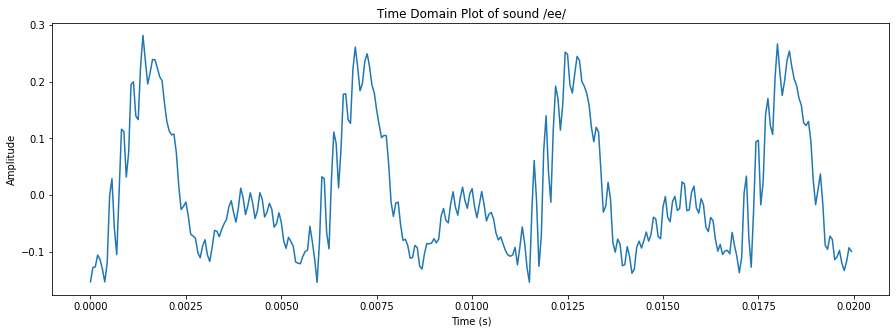

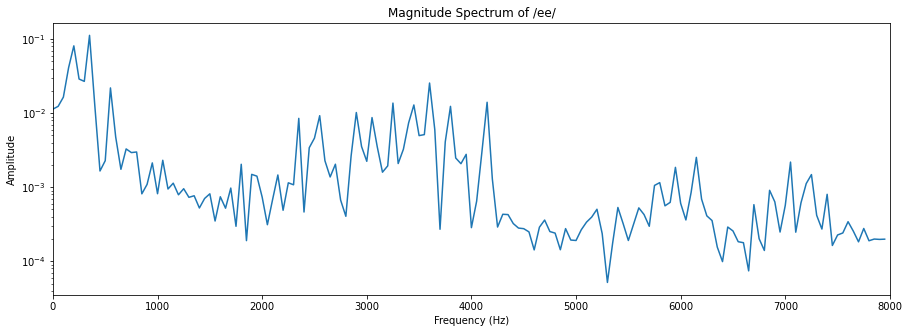

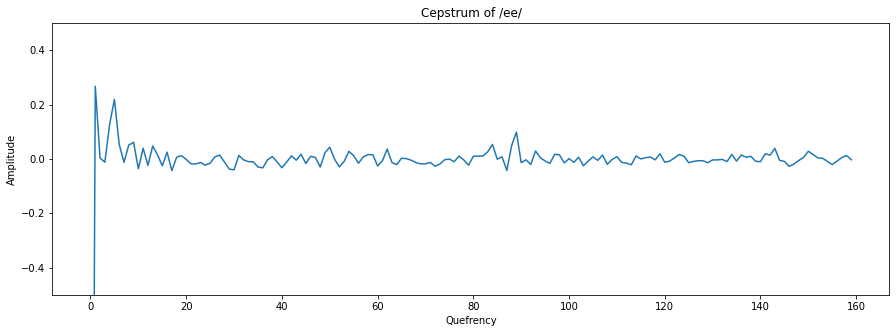

In [73]:
# Plotting the cepstrum of a voiced sound /ee/
wave_plot(ee, t_ee, "ee")
plot_spectrum(ee, "ee", type='log')
plot_cepstrum(ee, "ee")

In [70]:
# To get the cepstrum of both the sounds
cepstrum_ee = plot_cepstrum(ee, "ee", plot = False)
cepstrum_ss = plot_cepstrum(ss, "ss", plot = False)

In [59]:
# Defining a high time lifter which suppresses 13 low quefrency samples
high_time_lifter_ee = np.ones(cepstrum_ee.shape[0])
high_time_lifter_ee[0:13] = 0
high_time_lifter_ee[-13:-1] = 0
high_time_lifter_ee[-1] = 0

high_time_lifter_ss = np.ones(cepstrum_ss.shape[0])
high_time_lifter_ss[0:13] = 0
high_time_lifter_ss[-13:-1] = 0
high_time_lifter_ss[-1] = 0

# Performing high time liftering on both cepstrums
high_lifter_ee = np.multiply(cepstrum_ee, high_time_lifter_ee)
high_lifter_ss = np.multiply(cepstrum_ss, high_time_lifter_ss)

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Quefrency')]

<Figure size 720x720 with 0 Axes>

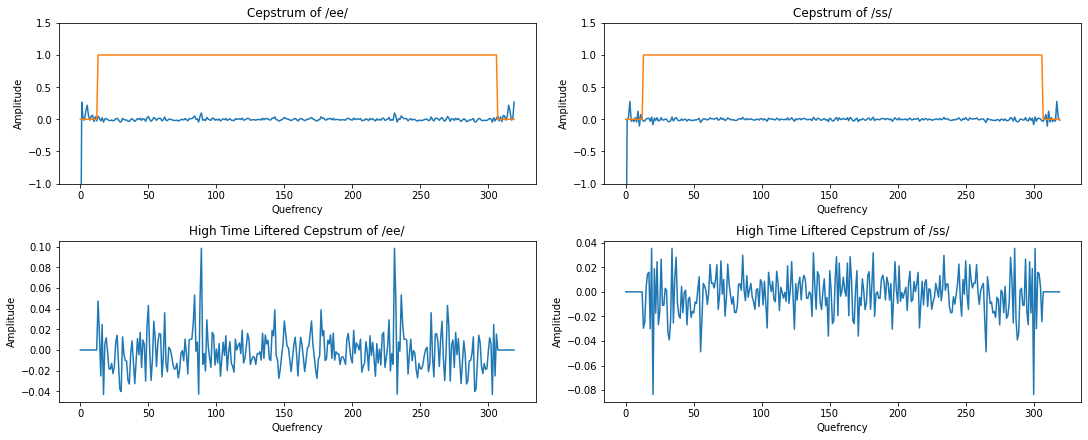

In [74]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(2, 2, figsize=(15,6), constrained_layout=True)
axs[0, 0].plot(cepstrum_ee)
axs[0, 0].plot(high_time_lifter_ee)
axs[0, 0].set_title('Cepstrum of /ee/')
axs[0, 0].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))
axs[0, 1].plot(cepstrum_ss)
axs[0, 1].plot(high_time_lifter_ss)
axs[0, 1].set_title('Cepstrum of /ss/')
axs[0, 1].set(xlabel = 'Quefrency', ylabel = 'Amplitude', ylim = (-1, 1.5))

axs[1, 0].plot(high_lifter_ee)
axs[1, 0].set_title('High Time Liftered Cepstrum of /ee/')
axs[1, 0].set(xlabel = 'Quefrency', ylabel = 'Amplitude')
axs[1, 1].plot(high_lifter_ss)
axs[1, 1].set_title('High Time Liftered Cepstrum of /ss/')
axs[1, 1].set(xlabel = 'Quefrency', ylabel = 'Amplitude')

In [79]:
# Estimating the pitch of the voiced speech using excitation information
max_index_ee = np.argmax(np.abs(high_lifter_ee))
pitch_period_ee = max_index_ee / fs

max_index_ss = np.argmax(np.abs(high_lifter_ss))
pitch_period_ss = max_index_ss / fs

print("Pitch period of sound /ee/:", pitch_period_ee, "s")
print("Pitch frequency of sound /ee/:", (1/pitch_period_ee), "Hz \n")

print("Pitch period of sound /ss/:", pitch_period_ss, "s")
print("Pitch frequency of sound /ss/:", (1/pitch_period_ss), "Hz")

Pitch period of sound /ee/: 0.0055625 s
Pitch frequency of sound /ee/: 179.77528089887642 Hz 

Pitch period of sound /ss/: 0.00125 s
Pitch frequency of sound /ss/: 800.0 Hz


## **Problem C**

Pitch estimation by Simple Inverse Filtering Technique (SIFT):
1. Take a 30 ms voiced speech segment and compute the Linear Prediction (LP) residual by LP analysis.  Perform autocorrelation on the LP residual. Estimate of pitch period from the autocorrelation sequence of the LP residual. 
2. Perform the same for the unvoiced speech segment also.


In [82]:
def matricInv(sound,p):
  acf = autocorr(sound, sound_name="")
  covMat = np.zeros([p,p])
  for i in range(p):
    for j in range(p):
      covMat[i,j] = acf[np.abs(i-j)]
  c = np.zeros([p,1])
  for i in range(p):
    c[i,0] = acf[i+1]
  #print(np.shape(covMat),np.shape(c))
  coeff = np.matmul(np.linalg.inv(covMat),c)
  coeff = coeff.T
  coeff = coeff.reshape(p)
  return coeff

In [119]:
def pitch_lpresidual(sound_acf, fs):

    pitch_estimate = 0
    period_delay = 0.00001
    h_threshold = 0.3 * sound_acf[0]

    sound_acf_peaks = signal.find_peaks(sound_acf, height = h_threshold)
    
    if (len(sound_acf_peaks[0]) > 0):
        period_delay = sound_acf_peaks[0][0] / fs

    pitch_estimate = 1 / period_delay

    return pitch_estimate

In [240]:
# Centre time stamp of the voiced sound /ee/ and /ss/ is obtained using WaveSurfer
# /ee/ sound => 0.48 s
# /ss/ sound => 0.97 s

frame_size = 0.030
ee = audio[int((0.48-(frame_size/2))*fs):int((0.48+(frame_size/2))*fs)]
t_ee = np.arange(0, ee.shape[0]/fs, 1/fs)
ss = audio[int((0.97-(frame_size/2))*fs):int((0.97+(frame_size/2))*fs)]
t_ss = np.arange(0, ss.shape[0]/fs, 1/fs)

In [241]:
p = 12

lp_coeff_ee = matricInv(ee, p)
lp_coeff_ss = matricInv(ss, p)

print("Estimated LPCs of the voiced sound /ee/ for p = 12:\n", lp_coeff_ee, "\n")
print("Estimated LPCs of the unvoiced sound /ss/ for p = 12:\n", lp_coeff_ss)

Estimated LPCs of the voiced sound /ee/ for p = 12:
 [ 1.35084357 -1.15353264  0.74628396  0.21185385  0.09909475 -0.32833204
  0.49925431 -0.40012988 -0.12410263  0.13389669 -0.19940478  0.06594885] 

Estimated LPCs of the unvoiced sound /ss/ for p = 12:
 [-0.31236907  0.19544     1.2289548   0.32847159 -0.31759769 -0.79541674
 -0.13359925  0.25961178  0.68943086  0.01070274 -0.09569166 -0.33172967]


In [242]:
# Using LPCs of the voiced sound /ee/ for deriving the filter H
A = np.insert(-1*lp_coeff_ee, 0, 1)

H = fft(A, len(ee))
H = 1/H
f_array = fftfreq(len(ee), 1/fs)

In [243]:
# DERIVING RESIDUAL SIGNAL
# We convolve the original signal with the A vector consisting of LPCs
residual = np.convolve(ee, A)
residual = residual[0:-len(A)+1]
t_res = np.arange(0, residual.shape[0]/fs, 1/fs)

# performing the autocorrelation of LP residual
res_autocorr_ee = autocorr(residual, sound_name="")

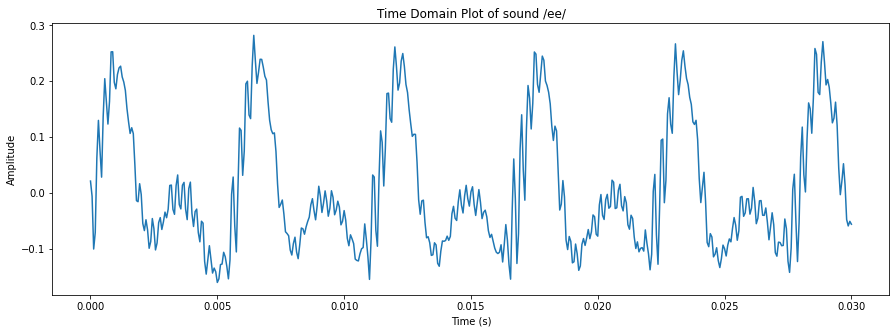

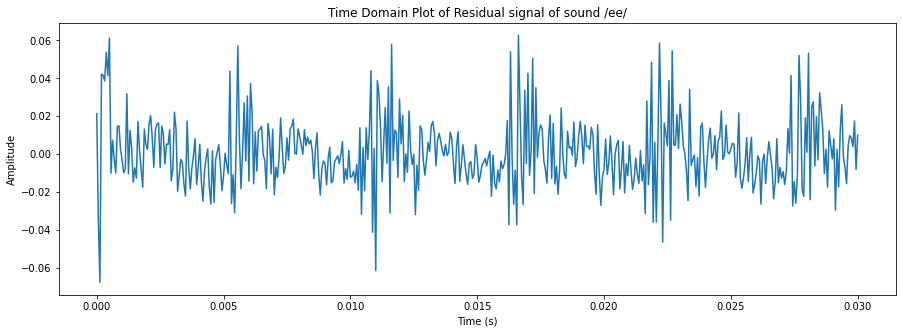

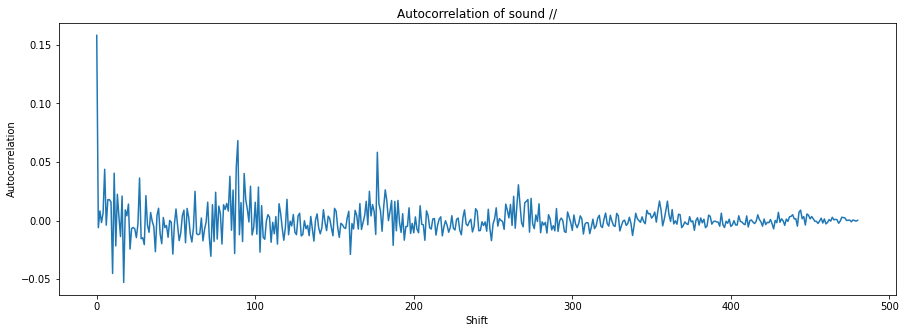

In [244]:
wave_plot(ee, t_ee, "ee")

plt.figure(figsize=(15,5))
plt.plot(t_res, np.real(residual))
plt.title("Time Domain Plot of Residual signal of sound /ee/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

autocorr(residual, sound_name="", plot=1)

In [135]:
# Using LPCs of the voiced sound /ee/ for deriving the filter H
A = np.insert(-1*lp_coeff_ss, 0, 1)

H = fft(A, len(ss))
H = 1/H
f_array = fftfreq(len(ss), 1/fs)

In [136]:
# DERIVING RESIDUAL SIGNAL
# We convolve the original signal with the A vector consisting of LPCs
residual = np.convolve(ss, A)
residual = residual[0:-len(A)+1]
t_res = np.arange(0, residual.shape[0]/fs, 1/fs)

# performing the autocorrelation of LP residual
res_autocorr_ss = autocorr(residual, sound_name="")

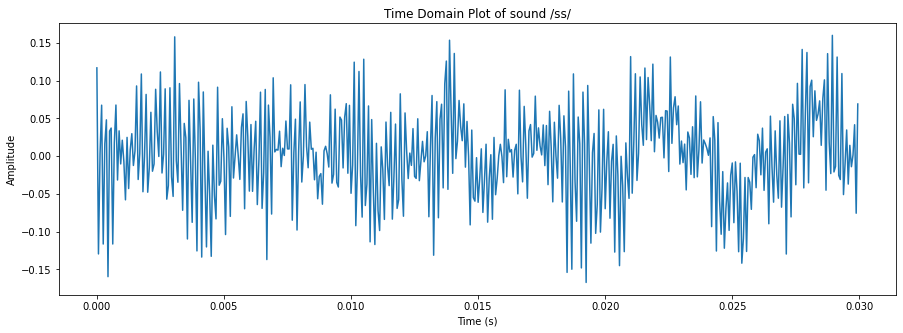

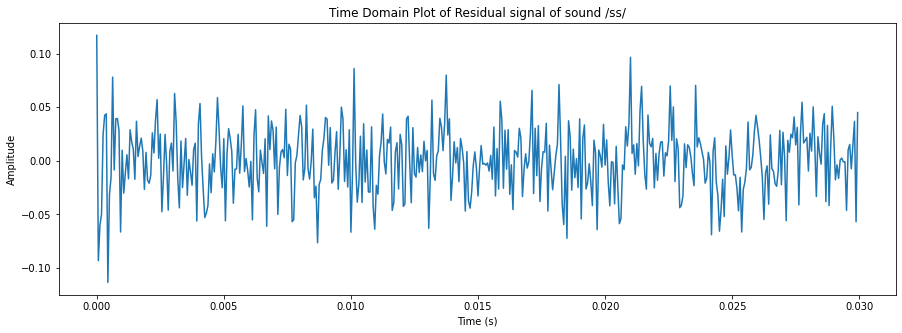

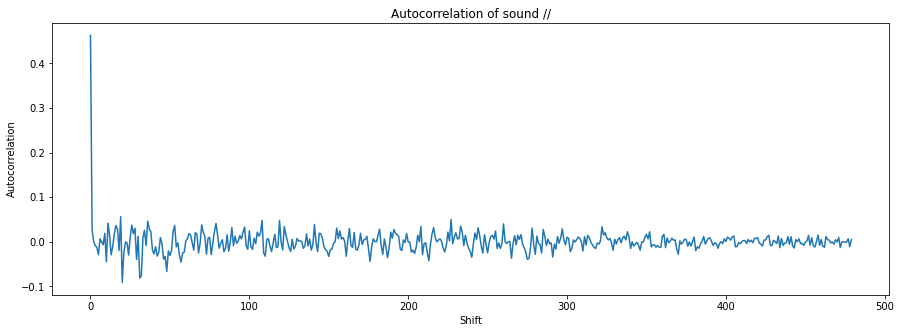

In [137]:
wave_plot(ss, t_ss, "ss")

plt.figure(figsize=(15,5))
plt.plot(t_res, np.real(residual))
plt.title("Time Domain Plot of Residual signal of sound /ss/")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

autocorr(residual, sound_name="", plot=1)

In [138]:
pitch_lp_ee = pitch_lpresidual(res_autocorr_ee, fs)
pitch_lp_ss = pitch_lpresidual(res_autocorr_ss, fs)

In [139]:
print("Pitch period of sound /ee/:", (1/pitch_lp_ee), "s")
print("Pitch frequency of sound /ee/:", pitch_lp_ee, "Hz \n")

print("Pitch period of sound /ss/:", (1/pitch_lp_ss), "s")
print("Pitch frequency of sound /ss/:", pitch_lp_ss, "Hz")

Pitch period of sound /ee/: 0.0055625 s
Pitch frequency of sound /ee/: 179.77528089887642 Hz 

Pitch period of sound /ss/: 1e-05 s
Pitch frequency of sound /ss/: 99999.99999999999 Hz


## **Problem D**

Comparison of pitch estimation methods:
1. Plot the entire input speech signal and it’s pitch contours  estimated using autocorrelation,  cepstrum and SIFT based pitch estimation methods.





In [245]:
def pitch_lpresidual(sound_acf, fs):

    pitch_estimate = 0
    period_delay = 0.00001
    h_threshold = 0.3 * sound_acf[0]

    sound_acf_peaks = signal.find_peaks(sound_acf, height = h_threshold)

    #print(sound_acf_peaks[0])
    
    if (len(sound_acf_peaks[0]) > 0):
        period_delay = sound_acf_peaks[0][0] / fs

    if ((period_delay*fs) > (fs/1000)):
        pitch_estimate = 1 / period_delay

    return pitch_estimate

In [185]:
def wave_plot_contour(sound, time=0, sound_name="", contour=0, frames=0, tag=""):
    
    if contour:
        plt.figure(figsize=(15,3))
        plt.scatter(frames, sound)
        plt.title("Pitch contour of sound "+ "/" + sound_name + "/ " + tag)
        plt.xlabel('Frame Index')
        plt.ylabel('Pitch Frequency')
        plt.show()

    else:
        plt.figure(figsize=(15,3))
        plt.plot(time, sound)
        plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()

In [186]:
def pitch_contour_autocorr(sound, frame_size, fs):

    number = int(np.floor(sound.shape[0]/(frame_size*fs)))
    pitch_frames = np.zeros((number, ))

    for i in range(number):
        frame = sound[int(i*frame_size*fs) : int((i+1)*frame_size*fs)]
        frame_autocorr = autocorr(frame)
        pitch_frames[i] = pitch_autocorr(frame_autocorr, fs)

    return pitch_frames

In [196]:
def pitch_contour_cepstrum(sound, frame_size, fs):

    number = int(np.floor(sound.shape[0]/(frame_size*fs)))
    pitch_frames = np.zeros((number, ))

    for i in range(number):
        frame = sound[int(i*frame_size*fs) : int((i+1)*frame_size*fs)]
        frame_cepstrum = plot_cepstrum(frame, "", plot= False)

        high_time_lifter = np.ones(frame_cepstrum.shape[0])
        high_time_lifter[0:13] = 0
        high_time_lifter[-13:-1] = 0
        high_time_lifter[-1] = 0

        high_lifter = np.multiply(frame_cepstrum, high_time_lifter)

        max_index = np.argmax(np.abs(high_lifter))
        pitch_frames[i] = fs / max_index

    return pitch_frames

In [246]:
def pitch_contour_lpres(sound, frame_size, fs):

    number = int(np.floor(sound.shape[0]/(frame_size*fs)))
    pitch_frames = np.zeros((number, ))
    p = 12

    for i in range(number):
        frame = sound[int(i*frame_size*fs) : int((i+1)*frame_size*fs)]
        lp_coeff = matricInv(frame, p)

        A = np.insert(-1*lp_coeff, 0, 1)
        H = fft(A, len(frame))
        H = 1/H

        residual = np.convolve(frame, A)
        residual = residual[0:-len(A)+1]
        res_autocorr = autocorr(residual, sound_name="")

        pitch_lp = pitch_lpresidual(res_autocorr, fs)
        pitch_frames[i] = pitch_lp

    return pitch_frames

In [249]:
frame_size = 0.020

number = int(np.floor(audio.shape[0]/(frame_size*fs)))
frames = np.arange(0, number, 1)

pitch_contour_acf = pitch_contour_autocorr(audio, frame_size, fs)
pitch_contour_cep = pitch_contour_cepstrum(audio, frame_size, fs)
pitch_contour_lp = pitch_contour_lpres(audio, frame_size, fs)

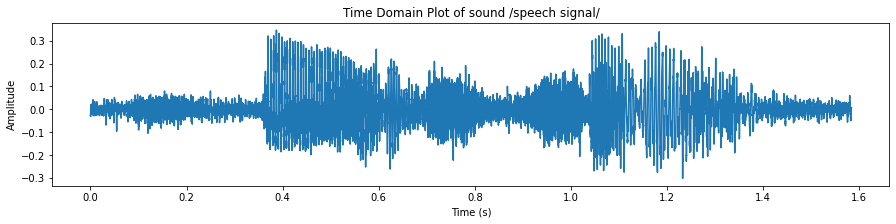

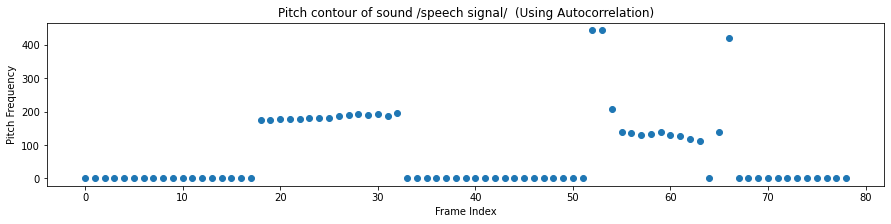

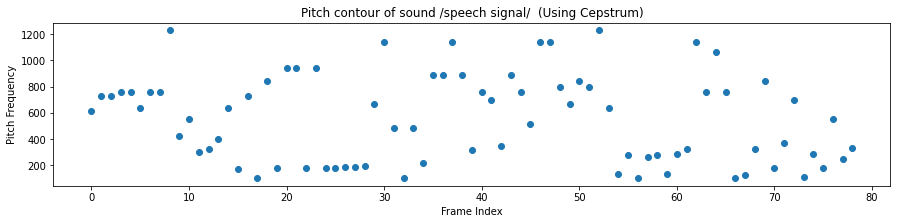

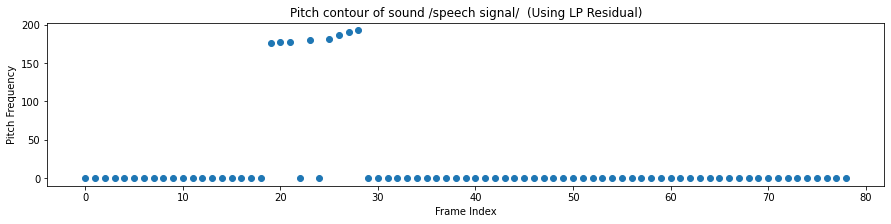

In [250]:
wave_plot_contour(audio, t, "speech signal")
wave_plot_contour(pitch_contour_acf, sound_name="speech signal", contour=1, frames = frames, tag=" (Using Autocorrelation)")
wave_plot_contour(pitch_contour_cep, sound_name="speech signal", contour=1, frames = frames, tag=" (Using Cepstrum)")
wave_plot_contour(pitch_contour_lp, sound_name="speech signal", contour=1, frames = frames, tag=" (Using LP Residual)")